

# <h1><center>An EDA of "Energy Medicine" in an Australian Psychology Practice</center></h1>


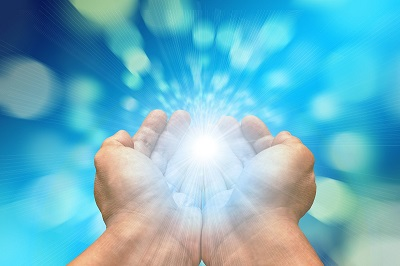

### Background
Energy Medicine is a complimentary therapy that improves wellbeing through manipulation of body energy. It is controversial but research shows it can be helpful for stress, anxiety, mood and quality of life. Often it is used in hospitals for people with cancer and chronic pain.

Energy medicine is becoming more popular in the wellness industry; however, few psychologists integrate it into their practice, mostly because it is too controversial. Psychologists are ethically bound to research their therapy, especially when they are unproven. So this niche can be targeted as long as the psychologist is applying the experimental intervention within a research context. 

The purpose of this analysis is twofold. Firsly, identify demographics of existing clients that can assist with planning and marketing. Secondly, clarify the type of client who receives energy medicine. This will also help with marketing and developing the practice research portfolio.

### Business questions
For the period 19/08/19 to 06/03/20:

1) What percentage of clients do not attend their first session?

2) What is the average age of clients?

3) What age should marketing target for energy healing clients?

4) What is the gender split of clients?

5) What is the average number of appointments per client?

6) What is the most common issue people seek support for?

7) What are the top 3 suburbs to target with the marketing?


### Readme
File: Clients_Aug19_March20.csv

File description
Datafile contains client data from a psychology practice in Sydney, Australia from August 2019 to March 2020.

Variables include
-ID (De-itentified ID)

-Problem (Reason for Treatment)

-Client Status (Active = currently engaged. "Cancelled" = the client cancelled their first booking or did not show)
-Age

-Gender (0 = female; 1= male)

-Suburb

-Source (referral source)

-Healing (whether the client has received energy medicine)

-Appointments (number of appointments from August 2019 to March 2020)

# Establishing the workspace and importing the dataframe

In [1]:
#Import packages needed.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [2]:
#Read the csv file
client = pd.read_csv('Client_Aug_Mar.csv')
client.head()

,ID,Problem,Type,Client Status,Gender,Age,Source,Suburb,Source.1,Healing,Appointments
0,100kieAl,Personality,Private (Standard),Active,Female,33.0,Internet,Menai,Internet,No,1.0
1,101kosPe,Personality,Private (Standard),Active,Male,43.0,Internet,Yarrawarra,Internet,No,7.0
2,102lanHe,Relationships,Agency (Standard),Active,Female,33.0,Agency,Woronora Heights,Agency,No,11.0
3,103lanJa,NaN,NaN,Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104lanKe,Substance use,Agency (Standard),Active,Female,64.0,Internet,Bomaderry,Internet,No,1.0


In [5]:
#Dataframe is working with descriptives for the raw data. 
#I can already see the distributions of age and appointments are correct.
client.describe()

,Age,Appointments
count,173.000000,204.000000
mean,37.994220,2.877451
std,12.023474,3.008965
min,15.000000,1.000000
25%,30.000000,1.000000
50%,37.000000,1.000000
75%,46.000000,4.000000
max,70.000000,18.000000




# Data Munging - detecting and removing redundant columns

In [6]:
#There is a duplicate column "Source". That needs removing.
del client['Source.1']

In [7]:
# Source.1 has been successfully removed.
client.head()

,ID,Problem,Type,Client Status,Gender,Age,Source,Suburb,Healing,Appointments
0,100kieAl,Personality,Private (Standard),Active,Female,33.0,Internet,Menai,No,1.0
1,101kosPe,Personality,Private (Standard),Active,Male,43.0,Internet,Yarrawarra,No,7.0
2,102lanHe,Relationships,Agency (Standard),Active,Female,33.0,Agency,Woronora Heights,No,11.0
3,103lanJa,NaN,NaN,Cancelled,NaN,NaN,NaN,NaN,NaN,NaN
4,104lanKe,Substance use,Agency (Standard),Active,Female,64.0,Internet,Bomaderry,No,1.0


In [8]:
#Screening for duplicate clients. There is one duplicate row.
dup_clients=client[client.duplicated()]
dup_clients

,ID,Problem,Type,Client Status,Gender,Age,Source,Suburb,Healing,Appointments
229,9amsAl,Relationships,Not Assigned,Active,Female,30.0,Colleague,Gymea Bay,No,1.0


In [9]:
#Viewing both duplicated rows to ensure they are the same.
client.loc[client.ID.duplicated(keep=False)]

,ID,Problem,Type,Client Status,Gender,Age,Source,Suburb,Healing,Appointments
228,9amsAl,Relationships,Not Assigned,Active,Female,30.0,Colleague,Gymea Bay,No,1.0
229,9amsAl,Relationships,Not Assigned,Active,Female,30.0,Colleague,Gymea Bay,No,1.0


In [3]:
#Row 229 needs to be dropped and the dataframe is saved as 'descrete_clients'
discrete_clients = client.drop_duplicates()

In [11]:
#When I call the new dataframe 'discrete_clients' there are no duplicates.
discrete_clients.loc[discrete_clients.ID.duplicated(keep=False)]

,ID,Problem,Type,Client Status,Gender,Age,Source,Suburb,Healing,Appointments




# Exploring missing data

In [12]:
#There are only 228 rows. I want to see them all.
pd.set_option("max_rows", None)
discrete_clients

,ID,Problem,Type,Client Status,Gender,Age,Source,Suburb,Healing,Appointments
0,100kieAl,Personality,Private (Standard),Active,Female,33.0,Internet,Menai,No,1.0
1,101kosPe,Personality,Private (Standard),Active,Male,43.0,Internet,Yarrawarra,No,7.0
2,102lanHe,Relationships,Agency (Standard),Active,Female,33.0,Agency,Woronora Heights,No,11.0
3,103lanJa,NaN,NaN,Cancelled,NaN,NaN,NaN,NaN,NaN,NaN
4,104lanKe,Substance use,Agency (Standard),Active,Female,64.0,Internet,Bomaderry,No,1.0
5,105lasAn,Relationships,Private (complementary),Active,Male,NaN,Internet,Grays Point,No,2.0
6,106lenAl,Stress,Private (complementary),Active,Female,25.0,Word of mouth,Woolooware,No,1.0
7,107letJa,Personality,Private (complementary),Active,Female,37.0,GP,Helensburgh,No,5.0
8,108leyAn,Anxiety,Private (Standard),Active,Male,47.0,Internet,Kareela,No,2.0
9,109leyBe,NaN,NaN,Cancelled,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#The structure of the dataframe looks okay. But I see lots of NaN and especially for clients with a status of 'cancelled'.
#How many NaN values are there? 
discrete_clients.isnull().sum().sum()

286

In [14]:
#Where are all the missing values located?
discrete_clients.isnull().sum()

ID                0
Problem          26
Type             26
Client Status     0
Gender           26
Age              57
Source           54
Suburb           45
Healing          26
Appointments     26
dtype: int64

In [13]:
#Missing values are widely distributed. Except for ID and Client Status. Examine clients wih status of cancelled. Firstly determine how many cancelled clients there are.
status=discrete_clients.groupby(['Client Status']).count()
status

,ID,Problem,Type,Gender,Age,Source,Suburb,Healing,Appointments
Client Status,,,,,,,,,
Active,203,203,203,203,172,175,184,203,203
Cancelled,26,0,0,0,0,0,0,0,0



#### Summary of missing values
There are missing values in Age, Source and Suburb for the 'Active' clients. This will be due to human error and missing information from referring agencies.

Cancelled clients have missing values in every field which is understandable because they never attend the practice and so we don't have their data. 

Cancelled clients must be dropped from the dataframe; however, before that is done the percentage of clients making appointments but not attending must be determined. This was a business question.

# Q1). What percentage of people do not attend their appointment?

In [4]:
status = discrete_clients['Client Status']
counts = status.value_counts()
percent100 = status.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, '%': percent100})

,counts,%
Active,203,88.6%
Cancelled,26,11.4%


#### <b>Summary of cancellation rates</b> 
From August 2019 to March 2020 there were 26 people who booked a consultation but did not attend. This is <b>11.4%</b> of total bookings for the period. No further demographics are available for these people because they never arrived at the practice.

<b>Recommendations:</b> If I can get more data from people when booking their appointment I may be able to clarify the demographics that are associated with non-attendance.




# Managing missing data
#### Now back to the issue of large amounts of missing data in the 'Cancelled' clients. Its time to remove them from the dataframe. 

In [6]:
# Now back to the issue of large amounts of missing data in the 'Cancelled' clients. Its time to remove them from the dataframe. 
active_clients = ['Active']
discrete_clients['Client Status'].isin(active_clients)

0       True
1       True
2       True
3      False
4       True
       ...  
224     True
225     True
226     True
227     True
228     True
Name: Client Status, Length: 229, dtype: bool

In [7]:
#Now I feed the boolean we create above into a new dataframe called 'clients_active'. 
#I can see that there are now 203 rows, which is perfect because I just removed the 26 'Cancelled' clients.
clients_active = discrete_clients[discrete_clients['Client Status'].isin(active_clients)]
clients_active.shape

(203, 11)

In [54]:
clients_active.describe().round(2)

,Age,Appointments
count,172.00,203.00
mean,38.04,2.89
std,12.04,3.01
min,15.00,1.00
25%,29.75,1.00
50%,37.00,1.00
75%,46.00,4.00
max,70.00,18.00


In [17]:
#And here I just wanted to look at the dataframe. It looks good. Now to address the remaining Nan values.
clients_active

,ID,Problem,Type,Client Status,Gender,Age,Source,Suburb,Healing,Appointments
0,100kieAl,Personality,Private (Standard),Active,Female,33.0,Internet,Menai,No,1.0
1,101kosPe,Personality,Private (Standard),Active,Male,43.0,Internet,Yarrawarra,No,7.0
2,102lanHe,Relationships,Agency (Standard),Active,Female,33.0,Agency,Woronora Heights,No,11.0
4,104lanKe,Substance use,Agency (Standard),Active,Female,64.0,Internet,Bomaderry,No,1.0
5,105lasAn,Relationships,Private (complementary),Active,Male,NaN,Internet,Grays Point,No,2.0
6,106lenAl,Stress,Private (complementary),Active,Female,25.0,Word of mouth,Woolooware,No,1.0
7,107letJa,Personality,Private (complementary),Active,Female,37.0,GP,Helensburgh,No,5.0
8,108leyAn,Anxiety,Private (Standard),Active,Male,47.0,Internet,Kareela,No,2.0
10,10amsKa,Personality,Agency (Standard),Active,Male,38.0,Previous client,NaN,No,4.0
11,110leyDa,Relationships,Private (Standard),Active,Male,NaN,Agency,Sutherland,No,1.0


In [18]:
#Where are the missing values now?
clients_active.isnull().sum()

ID                0
Problem           0
Type              0
Client Status     0
Gender            0
Age              31
Source           28
Suburb           19
Healing           0
Appointments      0
dtype: int64


# Q2) What is the average age of clients?

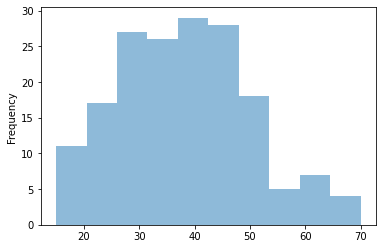

In [20]:
#what is the shape of the distribution of Age
clients_active['Age'].plot.hist(alpha=0.5)

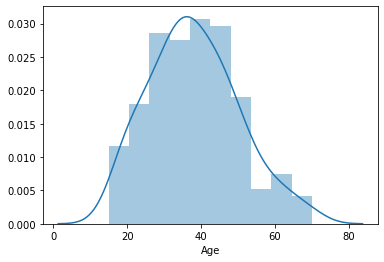

In [9]:
Age = clients_active['Age']
sns.distplot(Age);

In [11]:
mean_age = Age.mean()
print('Mean of clients = ' + str(round(mean_age,2)))

Mean of clients = 38.04


### From August 2019 to March 2020 the mean age of clients was 38 years.







### Replacing missing age data with the sample mean
I was curious about what effect replacing the missing age values with mean age would have on the distribution.

In [12]:
modified = clients_active['Age'].replace(to_replace = np.nan, value = mean_age) 
modified

0      33.000000
1      43.000000
2      33.000000
4      64.000000
5      38.040698
         ...    
224    25.000000
225    50.000000
226    38.000000
227    45.000000
228    30.000000
Name: Age, Length: 203, dtype: float64

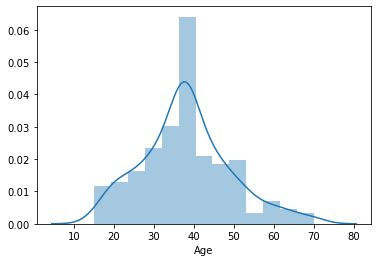

In [24]:
#I replace missing ages with mean age but I do not like the look of the distribution. 
# There is an excessive peak not at 38 years which is making it leptokurtic.
sns.distplot(modified)

In [25]:
print(Age.describe())

count    172.000000
mean      38.040698
std       12.042982
min       15.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       70.000000
Name: Age, dtype: float64


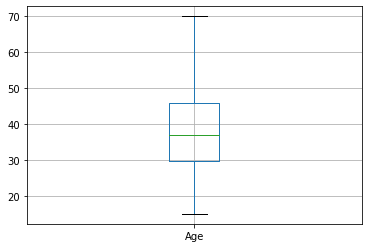

In [26]:
clients_active.boxplot('Age')

### Is there a difference in mean age between those clients receiving energy medicine and those that do not?

In [27]:
#Now lets see how Age might differ between those receiving energy medicine and those without.
Age_diff_healed=clients_active.groupby('Healing').Age.mean()
Age_diff_healed.round(2).astype(str)

Healing
No     37.81
Yes    39.03
Name: Age, dtype: object

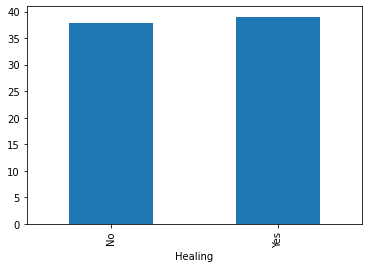

In [28]:
Age_diff_healed.plot.bar()

In [29]:
Age_energy=clients_active.groupby('Healing')
Age_energy.describe()

Age                                                        \
         count       mean        std   min    25%   50%    75%   max   
Healing                                                                
No       140.0  37.814286  12.355982  15.0  28.75  37.0  46.00  70.0   
Yes       32.0  39.031250  10.687600  21.0  32.50  37.5  44.25  64.0   

        Appointments                                                
               count      mean       std  min  25%  50%  75%   max  
Healing                                                             
No             168.0  2.416667  2.565120  1.0  1.0  1.0  3.0  18.0  
Yes             35.0  5.142857  3.911844  1.0  2.0  4.0  6.5  17.0


There is a narrower distribution of ages in the Healing group but the mean age is similar.


## Q3). What age should marketing target for energy healing clients?
People aged 32 to 44 years.


### As a bonus I have identified those clients with missing 'Age' so I can update my files.

In [30]:
#Here is the data for clients with missing Age
clients_active[clients_active['Age'].isnull()]

,ID,Problem,Type,Client Status,Gender,Age,Source,Suburb,Healing,Appointments
5,105lasAn,Relationships,Private (complementary),Active,Male,NaN,Internet,Grays Point,No,2.0
11,110leyDa,Relationships,Private (Standard),Active,Male,NaN,Agency,Sutherland,No,1.0
22,120manCa,Substance use,Private (complementary),Active,Female,NaN,NaN,NaN,No,1.0
23,121manDa,Autism,Private (Standard),Active,Female,NaN,Previous client,Camera Park,No,2.0
24,122manTa,Relationships,EAP Client,Active,Female,NaN,EAP,Miranda,No,4.0
34,131nemCa,Supervision,Supervision,Active,Female,NaN,NaN,Lakemba,No,1.0
36,133nerTa,Substance use,Private (complementary),Active,Female,NaN,Internet,Cronulla,No,1.0
38,135nesKa,Anxiety,EAP Client,Active,Female,NaN,EAP,Buraneer,No,2.0
43,13andJo,Relationships,EAP Client,Active,Female,NaN,EAP,Sutherland,No,5.0
44,140nicVe,Anxiety,Not Assigned,Active,Female,NaN,NaN,NaN,No,1.0


In [31]:
#Here are just the names of clients with missing Age
clients_no_age = clients_active.ID[clients_active['Age'].isnull()]
print(clients_no_age)

5      105lasAn
11     110leyDa
22     120manCa
23     121manDa
24     122manTa
34     131nemCa
36     133nerTa
38     135nesKa
43      13andJo
44     140nicVe
48     144nkoVa
61     156ottLo
64     159oweAm
72     166rgeKa
75     169risKi
80     173rpeBe
88     180skiSa
94     186sonMa
103    194tieSi
109     19ansSa
113    202uceJu
116    205uryJa
120    209vaiMi
128    216wenPa
132     21antPa
145     24ardAl
153     31bleLo
155     33cicLj
175     51ellCa
187     62ettMa
197     71hamMo
Name: ID, dtype: object


# Q4) What is the gender split of clients for the whole sample?

In [55]:
denom = client['Gender'].count()
client.groupby(['Gender'])['Gender'].count()*100/denom

Gender
Female         53.694581
Male           45.812808
Unspecified     0.492611
Name: Gender, dtype: float64

#### The gender split is 54% Females and 46% males.

## What is the gender split of standard and healing clients?

In [58]:
#I used SQL to create a new dataframe that contains only clients who did not receive the energy medicine treatment.
import sqlite3
from pandas.io import sql
client = pd.read_csv('clients_active.csv')
clients = pd.read_csv('C:\IOD\IOD_PT_Assignment1_EDA\clients_active.csv',encoding = 'utf-8')
db_connection = sqlite3.connect('clients.db.sqlite')
clients.to_sql('clients', db_connection)

C:\Users\Signature\anaconda3\lib\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


ValueError: Table 'clients' already exists.

In [59]:
query = """
    SELECT *
    FROM clients
    WHERE Healing = "No";
    """
normal_clients = sql.read_sql(query, con=db_connection)

In [83]:
#Calculating percentages of gender for standard clients
Total_Gender = normal_clients['Gender'].count()
males = normal_clients.Gender[normal_clients.Gender == "Male"]
male_count = males.count()
Percentage_male = male_count*100/Total_Gender
females = normal_clients.Gender[normal_clients.Gender == "Female"]
female_count = females.count()
Percentage_female = female_count*100/Total_Gender

Percentage_male.round(2).astype(str) + '%', Percentage_female.round(2).astype(str) + '%'

('48.21%', '51.19%')

#### So for clients who did not receive the healing service 48% were males and 51% were females.

#### Now I need to do the same for clients who did receive the energy medicine treatment. What is the percentage split for them?

In [61]:
# This time I want to create a datafram only for those who received the energy medicine but I want to do it with pandas.
Energy_clients = clients[clients.Healing == "Yes"]
Energy_clients

,ID,Problem,Type,Client Status,Gender,Age,Source,Suburb,Healing,Appointments
13,115lloMa,Obsessive-Compulsive,Private (complementary),Active,Female,29.0,Internet,Sutherland,Yes,11.0
24,126mbeSh,Anxiety,Private (complementary),Active,Female,26.0,Internet,Heathcote,Yes,7.0
42,148ollMe,Relationships,Private (Standard),Active,Female,34.0,GP,Bangor,Yes,3.0
43,149ollMe,Obsessive-Compulsive,Private (complementary),Active,Female,40.0,GP,Bangor,Yes,3.0
48,153oodMi,Substance use,Private (complementary),Active,Male,46.0,Internet,Gymea,Yes,4.0
62,167ricSt,Anxiety,Not Assigned,Active,Female,29.0,Internet,Menai,Yes,5.0
66,170risLi,Anxiety,Private (complementary),Active,Female,38.0,Colleague,Taren Point,Yes,2.0
74,180skiSa,Anxiety,Private (complementary),Active,Female,NaN,Internet,Woronora Heights,Yes,5.0
78,184sonJo,Adjustment,Private (complementary),Active,Male,37.0,Internet,Padstow,Yes,6.0
79,185sonLo,Relationships,Private (complementary),Active,Female,43.0,Internet,Worronora,Yes,5.0


In [74]:
#I am calculating the total number of genders here for those who did receive healing and this will be the denominator.
Total_Gender_Energy = Energy_clients['Gender'].count()
Total_Gender_Energy.round(2).astype(str) + '%'

'35%'

In [76]:
#Now I am doing the same proceedure as above but will streamline the code even more.
#(I watched this tutorial https://www.youtube.com/watch?v=2AFGPdNn4FM&t=7s)
males_energy = Energy_clients.Gender[Energy_clients.Gender == "Male"]
male_energy_count = males_energy.count()
Percentage_male_energy = male_energy_count*100/Total_Gender_Energy
Percentage_male_energy.round(2).astype(str) + '%'

'34.29%'

In [72]:
#Now I am doing the same proceedure for females.
#(I watched this tutorial https://www.youtube.com/watch?v=2AFGPdNn4FM&t=7s)
females_energy = Energy_clients.Gender[Energy_clients.Gender == "Female"]
female_energy_count = females_energy.count()
Percentage_female_energy = female_energy_count*100/Total_Gender_Energy
Percentage_female_energy.round(2).astype(str) + '%'

'65.71%'

In [82]:
print('Standard Clients')
print('Percentage females = '+str(Percentage_female))
print('Percentage males = '+str(Percentage_male))
print()
print('Energy Medicine Clients')
print('Percentage females = '+str(Percentage_female_energy))
print('Percentage males = '+str(Percentage_male_energy))

Standard Clients
Percentage females = 51.19047619047619
Percentage males = 48.214285714285715

Energy Medicine Clients
Percentage females = 65.71428571428571
Percentage males = 34.285714285714285


#### There is a gender difference between standard clients and energy medicine clients. More females are interested in energy medicine than males.

#### Problem - I need to create percentage columns and then feed them into a group by bar chart. I can do it with counts but don't know how to do it as a percentage.

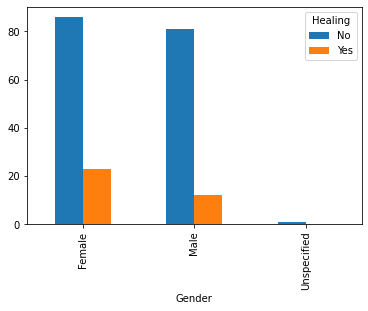

In [37]:
client.groupby(['Gender','Healing'])['Gender'].count().unstack('Healing').plot.bar()

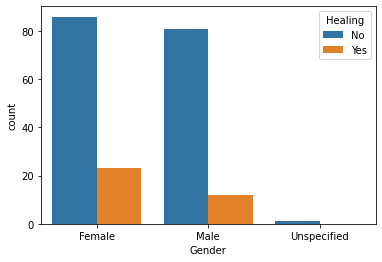

In [45]:
sns.countplot(data=clients,x='Gender',hue='Healing')

### Q6) What is the most common issue people seek support for?

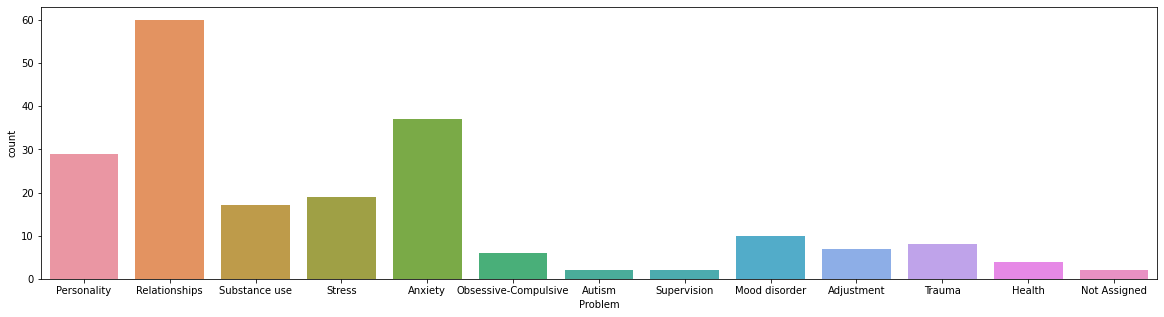

In [46]:
plt.figure(figsize = (20,5))
sns.countplot(data=client,x='Problem')

### Q7) What are the top 3 suburbs to target with the marketing?

In [44]:
status_suburb = client['Suburb']
counts = status_suburb.value_counts()
percent100 = status_suburb.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
Suburb_percentage = pd.DataFrame({'counts': counts, '%': percent100})
Suburb_percentage

,counts,%
Sutherland,18,9.8%
Caringbah,12,6.5%
Engadine,12,6.5%
Gymea,8,4.3%
Menai,8,4.3%
Como,8,4.3%
Bangor,8,4.3%
Cronulla,7,3.8%
Kirrawee,5,2.7%
Helensburgh,5,2.7%


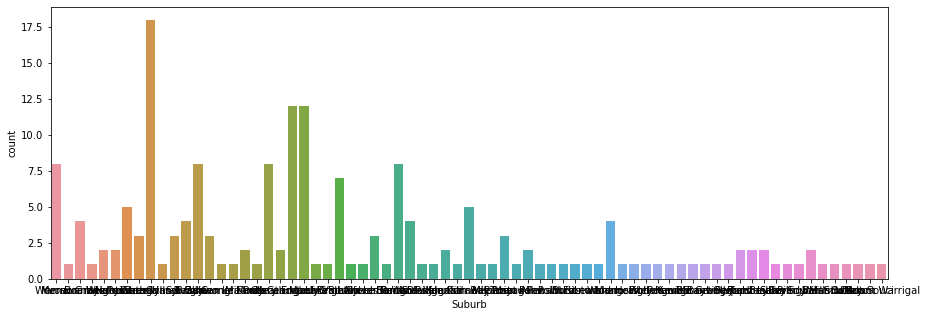

In [41]:
plt.figure(figsize = (15,5))
sns.countplot(data=clients,x='Suburb')

# Conclusions

For the period 19/08/19 to 06/03/20:

1) What percentage of clients do not attend their first session?
    - 11.4% of clients do not attend their first session.

2) What is the average age of clients?
    - The average age is 38 years
    
3) What age should marketing target for energy healing clients?
    - Marketing should target people aged 32 to 44 years. 
    - For more precise marketing it should be females aged 32 to 44 years.

4) What is the gender split of clients?
    - For the total sample it is 54% females and 46% males.
    - For standard clients the split is 48% males and 51% females.
    - For the energy medicine clients it is 34% males and 66% females.

5) What is the average number of appointments per client?
    - The number of appointments for a client is 2.89 but there is a wide distribution ranging from 1 to 18.
    - Standard clients will have on average 2.41 appointments.
    - Energy medicine clients will have an average of 5.14 appointments.

6) What is the most common issue people seek support for?
    - Relationship problems, anxiety and personality issues.

7) What are the top 3 suburbs to target with the marketing?
    - Sutherland, Caringbah, Engadine
